# Assignment 5 - Unsupervised Learning

## *Jake Bova*
Netid: jb240893

*Names of students you worked with on this assignment*: LIST HERE IF APPLICABLE (delete if not)

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

# Learning objectives
Through completing this assignment you will be able to...

2. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters
3. Apply PCA and t-SNE for performing dimensionality reduction and data visualization

# 2

## [25 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below. 
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is know as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each datasets, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When its not clear, you will have to use your judgement in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgement for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: for these clustering plots in this question, do NOT include legends indicating cluster assignment; instead just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*

Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [ ]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [ ]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'No. Clusters = {n_clusters}')
        ax.axis('equal')

**ANSWER**

a):

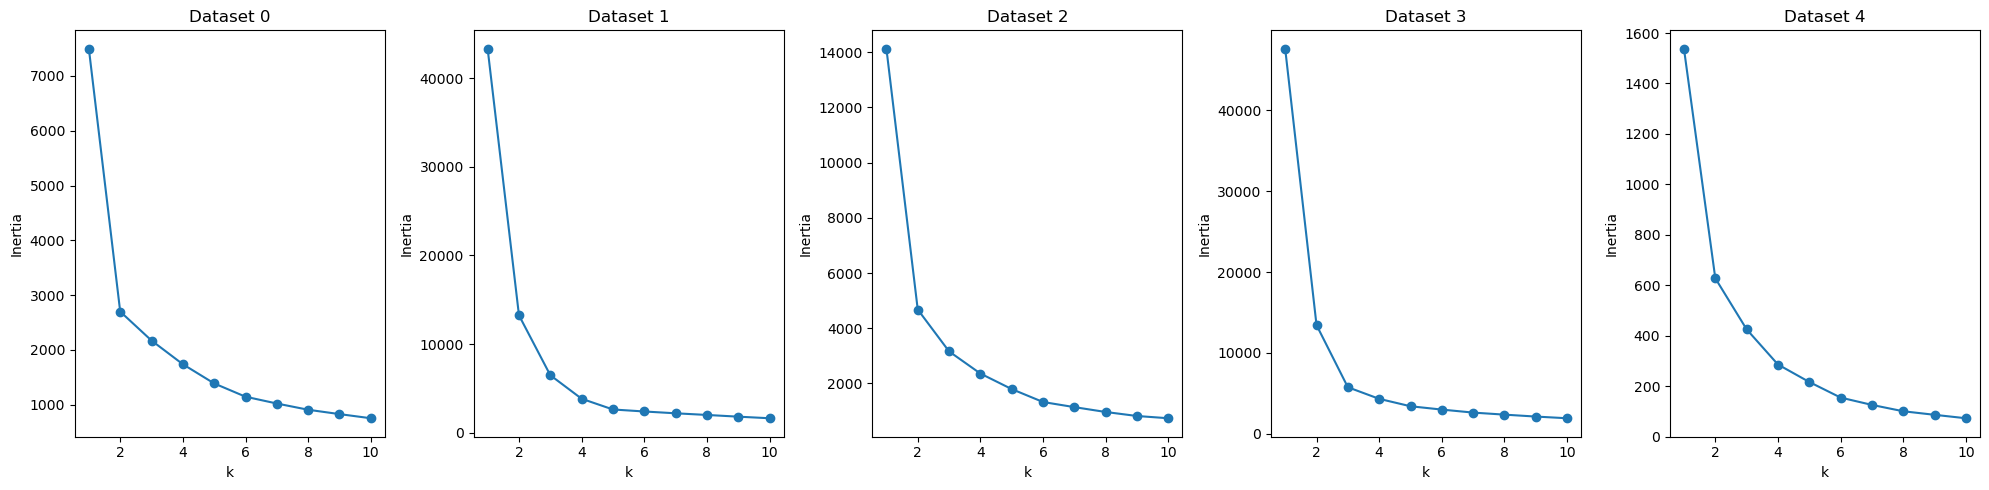

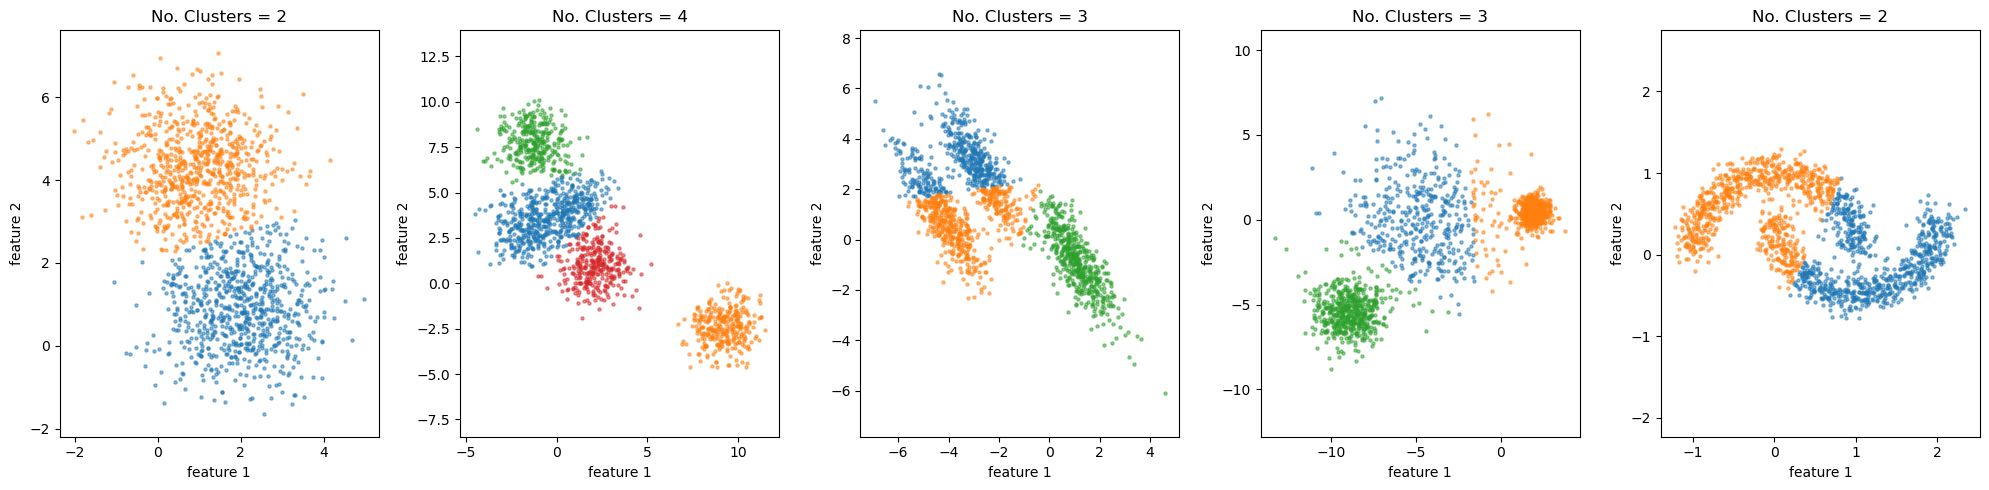

In [42]:
from sklearn.cluster import KMeans

# Plot the elbow curve for each dataset
fig, axs = plt.subplots(1,5, figsize=(20,5))
for i, data in enumerate(X):
    inertias = []
    for k in range(1,11):
        km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(data)
        inertias.append(km.inertia_)
    axs[i].plot(range(1,11), inertias, marker='o')
    axs[i].set_xlabel('k')
    axs[i].set_ylabel('Inertia')
    axs[i].set_title(f'Dataset {i}')
plt.tight_layout()
plt.show()

X_ideal_kvals = [2, 4, 3, 3, 2] # from inspection of the  elbow curves and the data plots

# plot the clustered data for each dataset
fig, axs = plt.subplots(1,5, figsize=(20,5))
for i, data in enumerate(X):
    km = KMeans(n_clusters=X_ideal_kvals[i], random_state=42, n_init=10).fit(data)
    plot_cluster(axs[i], data, km.labels_)
plt.tight_layout()
plt.show()

b):

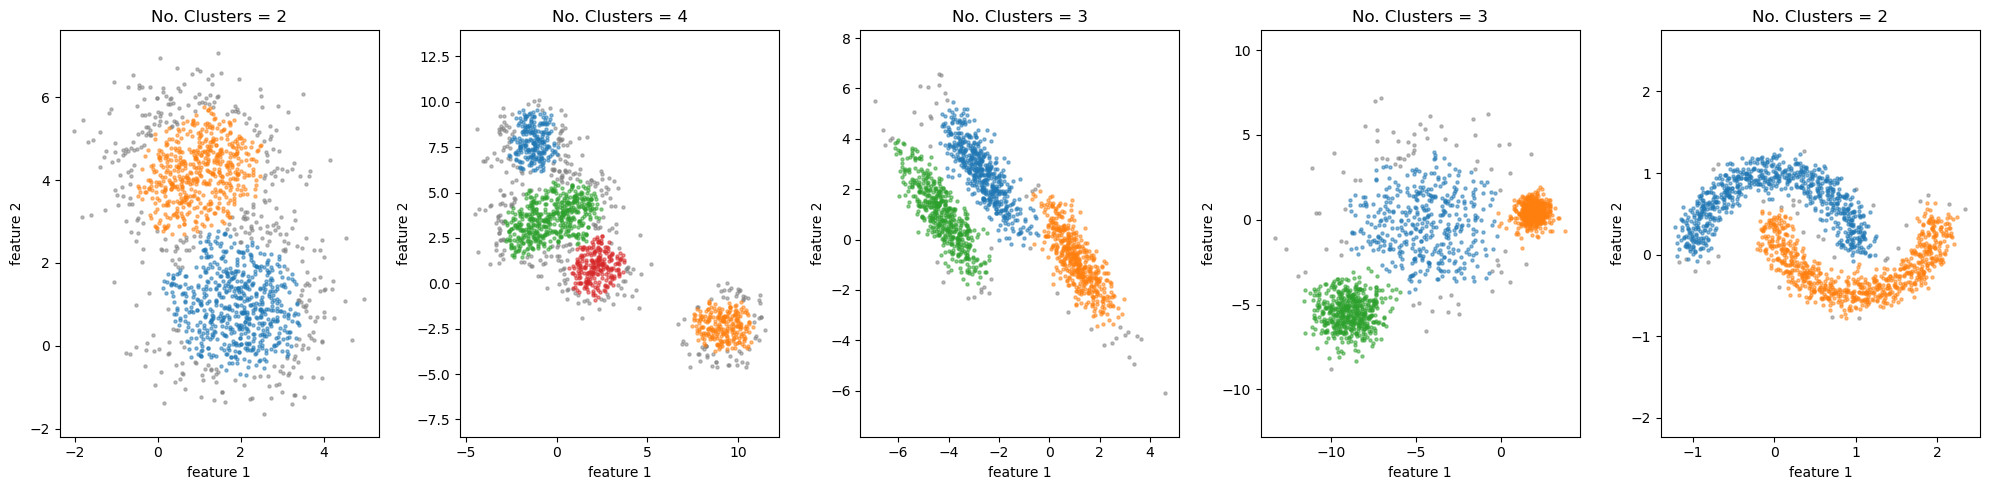

In [41]:
# **(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

from sklearn.cluster import DBSCAN

best_dbscan_params_ordered = {
    "X0": {"eps": 0.4, "min_samples": 32},
    "X1": {"eps": 0.4, "min_samples": 12},
    "X2": {"eps": 0.5, "min_samples": 16},
    "X3": {"eps": 0.9, "min_samples": 12},
    "X4": {"eps": 0.1, "min_samples": 5},
}
# The above parameters were found by trial and error to get the same number of clusters as the K-means results (and to get the best looking clusters)

# plot the clustered data for each dataset
fig, axs = plt.subplots(1,5, figsize=(20,5))
for i, data in enumerate(X):
    db = DBSCAN(eps=best_dbscan_params_ordered[f"X{i}"]["eps"], min_samples=best_dbscan_params_ordered[f"X{i}"]["min_samples"]).fit(data)
    plot_cluster(axs[i], data, db.labels_)
plt.tight_layout()
plt.show()

c):

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


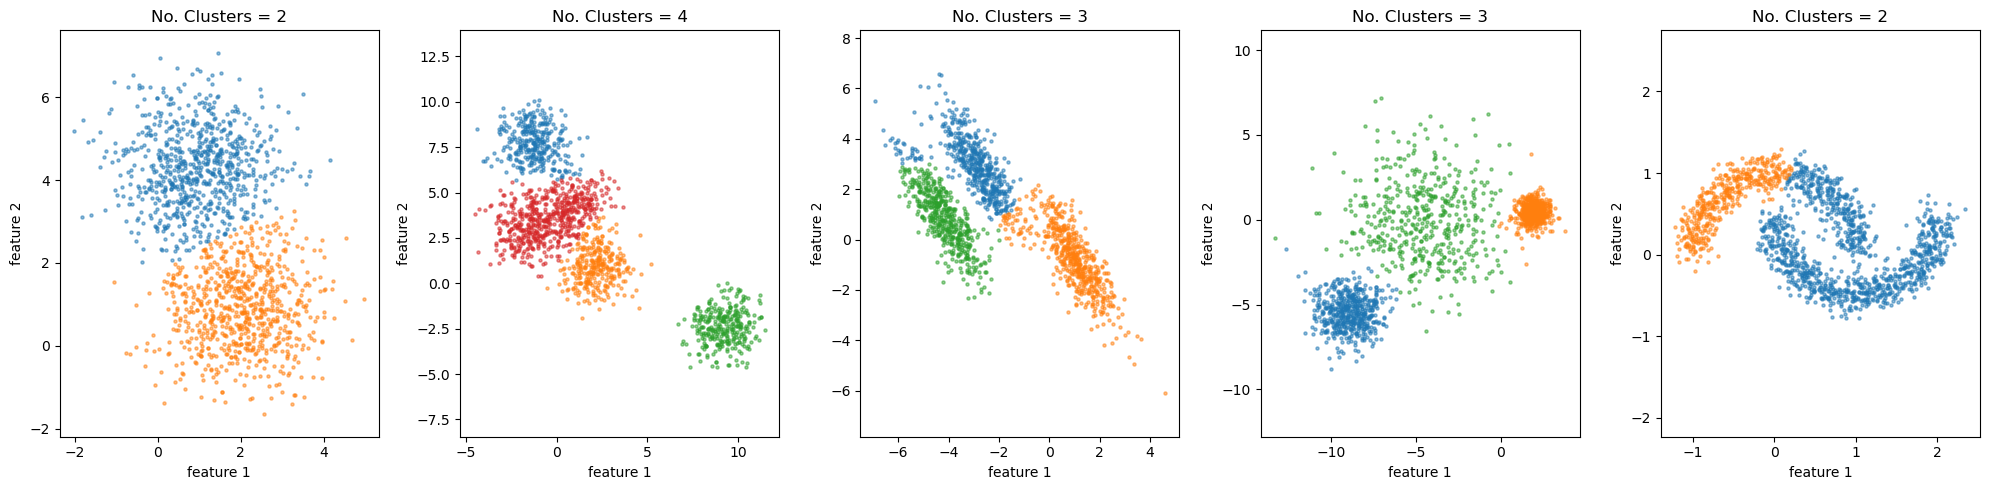

In [43]:
# **(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

from sklearn.cluster import SpectralClustering

# plot the clustered data for each dataset
fig, axs = plt.subplots(1,5, figsize=(20,5))
for i, data in enumerate(X):
    sc = SpectralClustering(n_clusters=X_ideal_kvals[i], affinity='nearest_neighbors', n_neighbors=10).fit(data)
    plot_cluster(axs[i], data, sc.labels_)
plt.tight_layout()
plt.show()

Table of results (* indicates best result):

| Dataset | K-means | DBSCAN | Spectral |
| --- | --- | --- | --- |
| 0 | great* | okay | great* |
| 1 | great* | okay | great* |
| 2 | bad | great* | okay |
| 3 | okay | okay | great* |
| 4 | bad | great* | bad |

Parameter tuning for K-means was easy, but for DBSCAN it was difficult (manually changing params and running again). For Spectral, it was easy since I just used the same number of clusters as K-means.

# 3

## [25 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that t-SNE doesn't have a `fit` method, but only a `fit_transform` method. Why is this? What implications does this imply for using this method?
*Note: Remember that you typically will not have labels available in most problems.*

Code is provided for loading the data below.

In [44]:
################################
# Load the data
################################
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

**ANSWER**

a):

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


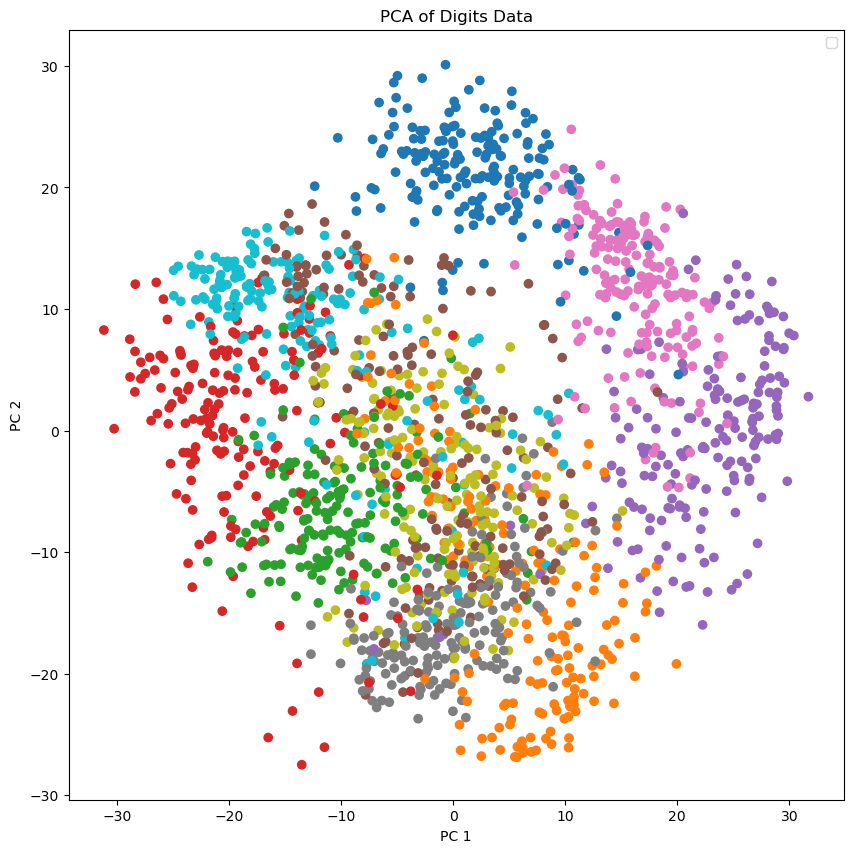

In [46]:
# **(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(X_pca[:,0], X_pca[:,1], c=y_digits, cmap='tab10')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('PCA of Digits Data')
ax.legend()
plt.show()